# Load Modules

In [1]:
import pandas as pd
import numpy as np
import lucem_illud
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import html
import re

# Prepare the Data

In [2]:
# Read the dataframe containing all detailed funding information
funding_info = pd.read_csv("database/funding_info.csv")
funding_info.drop(columns=['Unnamed: 0'], inplace=True)
funding_info.head()

,first_name,middle_name,last_name,email,institution,directorate,division,effective_date,expiration_date,award_amount,award_title,abstract,award_year
0,Jean,NaN,Comaroff,jcomaro@uchicago.edu,University of Chicago,"Direct For Social, Behav & Economic Scie",Division Of Behavioral and Cognitive Sci,02/01/2011,01/31/2013,20000,Doctoral Dissertation Research: The Role of Kn...,University of Chicago doctoral student Brenden...,2011
1,Talal,NaN,Asad,talalasad@earthlink.net,CUNY Graduate School University Center,"Direct For Social, Behav & Economic Scie",Division Of Behavioral and Cognitive Sci,01/01/2011,09/30/2012,19901,Doctoral Dissertation Research: Mental Disorde...,Doctoral student Ana Maria Vinea (Graduate Cen...,2011
2,John,NaN,Cherry,John_Cherry@brown.edu,Brown University,"Direct For Social, Behav & Economic Scie",Division Of Behavioral and Cognitive Sci,01/01/2011,06/30/2012,14820,Doctoral Dissertation Improvement Grant: Rethi...,In collaboration with the Central Lydia Archae...,2011
3,Leaf,NaN,Van Boven,vanboven@colorado.edu,University of Colorado at Boulder,"Direct For Social, Behav & Economic Scie",Division Of Behavioral and Cognitive Sci,04/01/2011,03/31/2015,250000,EAGER: Perceiving Political Distributions,The present research focuses on motivated poli...,2011
4,Steven,NaN,Bedrick,bedricks@ohsu.edu,Oregon Health & Science University,"Direct For Social, Behav & Economic Scie",Division Of Behavioral and Cognitive Sci,04/01/2011,09/30/2013,114140,"Corpora of Non-Linguistic Symbol Systems, and ...","Throughout the millenia, humans have used grap...",2011


In [3]:
# Read the dataframe containing all funding, author and publication information for each awarded author
combined_info = pd.read_csv("database/preprocessed_content_analysis.csv")
combined_info.head()

,Unnamed: 0,first_name,middle_name,last_name,email,institution,award_year,award_amount,paper_title,journal,...,citation_2019,citation_2020,citation_2021,citation_2022,citation_2023,citation_2024,tokenized_title,normalized_title,tokenized_abstract,normalized_abstract
0,0,Talal,NaN,Asad,talalasad@earthlink.net,cuny graduate school university center,2011,19901,Effect of oxidation and geometrical dimensions...,Desalination,...,13,5,10,5,7,1,"['Effect', 'of', 'oxidation', 'and', 'geometri...","['effect', 'oxidation', 'geometrical', 'dimens...","['This', 'study', 'reports', 'for', 'the', 'fi...","['study', 'report', 'time', 'use', 'oxidize', ..."
1,1,Talal,NaN,Asad,talalasad@earthlink.net,cuny graduate school university center,2011,19901,Synthesis and biological evaluation of new pyr...,Molecules,...,13,5,10,5,7,1,"['Synthesis', 'and', 'biological', 'evaluation...","['synthesis', 'biological', 'evaluation', 'new...","['A', 'selected', 'set', 'of', 'substituted', ...","['select', 'set', 'substituted', 'pyridone', '..."
2,2,Talal,NaN,Asad,talalasad@earthlink.net,cuny graduate school university center,2011,19901,"Synthesis of 6-Ethyl-1, 2, 9-trioxopyrrolo [3,...",Zeitschrift für Naturforschung B,...,13,5,10,5,7,1,"['Synthesis', 'of', '6', 'Ethyl-1', '2', '9', ...","['synthesis', 'ethyl-1', 'trioxopyrrolo', 'f',...","['Interaction', 'of', '6', 'amino-1', 'ethyl-4...","['interaction', 'amino-1', 'ethyl-4', 'oxoquin..."
3,3,Talal,NaN,Asad,talalasad@earthlink.net,cuny graduate school university center,2011,19901,"Randa M. Al-As’ ada, Mustafa M. El-abadelaha, ...",Z. Naturforsch,...,13,5,10,5,7,1,"['Randa', 'M.', 'Al', 'As', 'ada', 'Mustafa', ...","['randa', 'm.', 'al', 'ada', 'mustafa', 'm.', ...","['Interaction', 'of', '6', 'amino-1', 'ethyl-4...","['interaction', 'amino-1', 'ethyl-4', 'oxoquin..."
4,4,Leaf,NaN,Van Boven,vanboven@colorado.edu,university of colorado at boulder,2011,250000,Identifiable but not identical: Combining soci...,Journal of Consumer research,...,868,1234,1132,1198,1222,179,"['Identifiable', 'but', 'not', 'identical', 'C...","['identifiable', 'identical', 'combine', 'soci...","['How', 'do', 'consumers', 'reconcile', 'confl...","['consumer', 'reconcile', 'conflicting', 'moti..."


In [4]:
combined_info.columns

Index(['first_name', 'middle_name', 'last_name', 'email', 'institution',
       'award_year', 'award_amount', 'paper_title', 'journal',
       'publication_year', 'coauthors', 'paper_abstract',
       'paper_total_citations', 'citation_2001', 'citation_2002',
       'citation_2003', 'citation_2004', 'citation_2005', 'citation_2006',
       'citation_2007', 'citation_2008', 'citation_2009', 'citation_2010',
       'citation_2011', 'citation_2012', 'citation_2013', 'citation_2014',
       'citation_2015', 'citation_2016', 'citation_2017', 'citation_2018',
       'citation_2019', 'citation_2020', 'citation_2021', 'citation_2022',
       'citation_2023', 'citation_2024', 'tokenized_title', 'normalized_title',
       'tokenized_abstract', 'normalized_abstract'],
      dtype='object')

In [4]:
regression_data = pd.read_csv("regression/regression_data.csv")
regression_data.drop(columns=['Unnamed: 0'], inplace=True)
regression_data.head()

,email,year,institution,interests,award_year,expiration_year,award_amount,award_title,total_citations,h_index,citation,pub_num,top_cited
0,00t0holtgrav@bsu.edu,2011,Ball State University,['Social Psychology and Language'],2012,2017,0,The Role of Interpersonal Processes in the Int...,10066,46,367.0,2,135.000000
1,00t0holtgrav@bsu.edu,2012,Ball State University,['Social Psychology and Language'],2012,2017,165000,The Role of Interpersonal Processes in the Int...,10066,46,409.0,4,14.666667
2,00t0holtgrav@bsu.edu,2013,Ball State University,['Social Psychology and Language'],2012,2017,165000,The Role of Interpersonal Processes in the Int...,10066,46,534.0,7,281.666660
3,00t0holtgrav@bsu.edu,2014,Ball State University,['Social Psychology and Language'],2012,2017,165000,The Role of Interpersonal Processes in the Int...,10066,46,550.0,8,32.333332
4,00t0holtgrav@bsu.edu,2015,Ball State University,['Social Psychology and Language'],2012,2017,165000,The Role of Interpersonal Processes in the Int...,10066,46,496.0,3,14.000000


In [6]:
regression_data.columns

Index(['email', 'year', 'institution', 'interests', 'award_year',
       'expiration_year', 'award_amount', 'award_title', 'total_citations',
       'h_index', 'citation', 'pub_num', 'top_cited'],
      dtype='object')

# Basic Descriptive Statistics

# Funding Overview

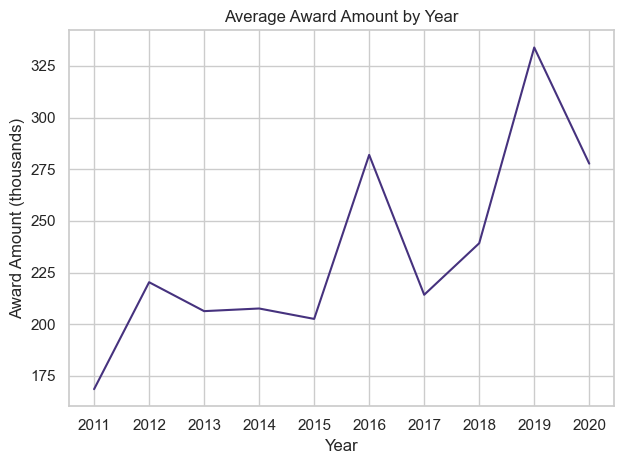

In [12]:
# First, plot a line chart showing average NSF funding amount per year
avg_funding_by_year = pd.DataFrame(np.round(combined_info.groupby(by=['award_year'])['award_amount'].mean() / 1000, 2))

sns.set_theme(style="whitegrid", palette="viridis")
sns.lineplot(data=avg_funding_by_year, x='award_year', y='award_amount')
plt.xticks(ticks=np.unique(combined_info['award_year']), labels=np.unique(combined_info['award_year']))
plt.title('Average Award Amount by Year')
plt.xlabel('Year')
plt.ylabel('Award Amount (thousands)')
plt.tight_layout()
plt.savefig('average_funding_by_year.png', format='png', dpi=300, bbox_inches='tight')

#  Author Research Impact

# Research Trends and Interests

In [6]:
# There are rows where absract are not string (but instead float)
# Upon checking, they are NaN.
funding_info[funding_info['abstract'].apply(lambda x: not isinstance(x, str))]

,first_name,middle_name,last_name,email,institution,directorate,division,effective_date,expiration_date,award_amount,award_title,abstract,award_year
1854,Joshua,NaN,Fisher,Joshua.B.Fisher@jpl.nasa.gov,National Aeronautics and Space Administration,"Direct For Social, Behav & Economic Scie",Division Of Behavioral and Cognitive Sci,09/01/2014,02/28/2018,99114,Collaborative Research: Links Between Long-Ter...,NaN,2014
3991,Marc,M,Sebrechts,sebrechts@cua.edu,Catholic University of America,"Direct For Social, Behav & Economic Scie",Division Of Behavioral and Cognitive Sci,08/01/2018,08/19/2022,212550,IPA Agreement,NaN,2018
4570,Peter,M,Vishton,vishton@wm.edu,College of William and Mary,"Direct For Social, Behav & Economic Scie",Division Of Behavioral and Cognitive Sci,09/03/2019,09/02/2022,136965,IPA Award,NaN,2019
4579,Tyler,NaN,Kendall,tsk@uoregon.edu,University of Oregon Eugene,"Direct For Social, Behav & Economic Scie",Division Of Behavioral and Cognitive Sci,08/18/2019,08/18/2022,150470,New IPA Award,NaN,2019
4602,Siobhan,NaN,Mattison,siobhan.mattison@gmail.com,University of New Mexico,"Direct For Social, Behav & Economic Scie",Division Of Behavioral and Cognitive Sci,09/03/2019,09/02/2023,124135,New IPA Award - Siobhan Mattison,NaN,2019
4942,Trisha,NaN,Van Zandt,van-zandt.2@osu.edu,Ohio State University,"Direct For Social, Behav & Economic Scie",Division Of Behavioral and Cognitive Sci,07/06/2020,07/05/2022,187691,IPA agreement for Dr. Trisha Van Zandt,NaN,2020


In [11]:
# Drop rows where abstract is NaN
funding_info = funding_info[funding_info['abstract'].notna()]

In [ ]:
# Word cloud for funding abstract over the years
funding_info['tokenized_abstract'] = funding_info['abstract'].apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
funding_info['normalized_abstract'] = funding_info['tokenized_abstract'].apply(lambda x: [lucem_illud.normalizeTokens(s) for s in x])
funding_info.head()

In [11]:
funding_info['wordcloud_text'] = funding_info['normalized_abstract'].apply(lambda x: [item for sublist in x for item in sublist])
funding_info.head()

,first_name,middle_name,last_name,email,institution,directorate,division,effective_date,expiration_date,award_amount,award_title,abstract,award_year,tokenized_abstract,normalized_abstract,wordcloud_text
0,Jean,NaN,Comaroff,jcomaro@uchicago.edu,University of Chicago,"Direct For Social, Behav & Economic Scie",Division Of Behavioral and Cognitive Sci,02/01/2011,01/31/2013,20000,Doctoral Dissertation Research: The Role of Kn...,University of Chicago doctoral student Brenden...,2011,"[[University, of, Chicago, doctoral, student, ...","[[university, chicago, doctoral, student, bren...","[university, chicago, doctoral, student, brend..."
1,Talal,NaN,Asad,talalasad@earthlink.net,CUNY Graduate School University Center,"Direct For Social, Behav & Economic Scie",Division Of Behavioral and Cognitive Sci,01/01/2011,09/30/2012,19901,Doctoral Dissertation Research: Mental Disorde...,Doctoral student Ana Maria Vinea (Graduate Cen...,2011,"[[Doctoral, student, Ana, Maria, Vinea, Gradua...","[[doctoral, student, ana, maria, vinea, gradua...","[doctoral, student, ana, maria, vinea, graduat..."
2,John,NaN,Cherry,John_Cherry@brown.edu,Brown University,"Direct For Social, Behav & Economic Scie",Division Of Behavioral and Cognitive Sci,01/01/2011,06/30/2012,14820,Doctoral Dissertation Improvement Grant: Rethi...,In collaboration with the Central Lydia Archae...,2011,"[[In, collaboration, with, the, Central, Lydia...","[[collaboration, central, lydia, archaeologica...","[collaboration, central, lydia, archaeological..."
3,Leaf,NaN,Van Boven,vanboven@colorado.edu,University of Colorado at Boulder,"Direct For Social, Behav & Economic Scie",Division Of Behavioral and Cognitive Sci,04/01/2011,03/31/2015,250000,EAGER: Perceiving Political Distributions,The present research focuses on motivated poli...,2011,"[[The, present, research, focuses, on, motivat...","[[present, research, focuses, motivated, polit...","[present, research, focuses, motivated, politi..."
4,Steven,NaN,Bedrick,bedricks@ohsu.edu,Oregon Health & Science University,"Direct For Social, Behav & Economic Scie",Division Of Behavioral and Cognitive Sci,04/01/2011,09/30/2013,114140,"Corpora of Non-Linguistic Symbol Systems, and ...","Throughout the millenia, humans have used grap...",2011,"[[Throughout, the, millenia, humans, have, use...","[[millenia, humans, graphical, symbols], [year...","[millenia, humans, graphical, symbols, years, ..."


In [20]:
# Define a function to remove html components in the string
def remove_html(content_list):
    # Convert HTML entities to their corresponding characters
    cleaned_content_list = []

    for i in content_list:
        decoded_content = html.unescape(i)
    
        # Remove HTML tags
        clean_content = re.sub(r'<[^>]*>', '', decoded_content)

        cleaned_content_list.append(clean_content)

    
    return cleaned_content_list

In [23]:
funding_info['wordcloud_text_cleaned'] = funding_info['wordcloud_text'].apply(remove_html)

In [25]:
# Group the normalized abstract tokens by award year
funding_info_aggregated_words = funding_info.groupby('award_year')['wordcloud_text_cleaned'].agg(lambda x: sum(x, [])).reset_index()
funding_info_aggregated_words['wordcloud_text_cleaned'] = funding_info_aggregated_words['wordcloud_text_cleaned'].apply(lambda x: ' '.join(x))
funding_info_aggregated_words

,award_year,wordcloud_text_cleaned
0,2011,university chicago doctoral student brenden ra...
1,2012,primary goal project extend current signtyp da...
2,2013,funding national science foundation dr glenn s...
3,2014,wars afghanistan iraq characterized exceptiona...
4,2015,sarah hlubik rutgers state university new jers...
5,2016,essential elements constitute minimal scientif...
6,2017,past decades cutting edge social personality p...
7,2018,award nsf eager funding mechanism supports ear...
8,2019,project combine genomic historical archaeologi...
9,2020,financial activities ubiquitous worldwide glob...


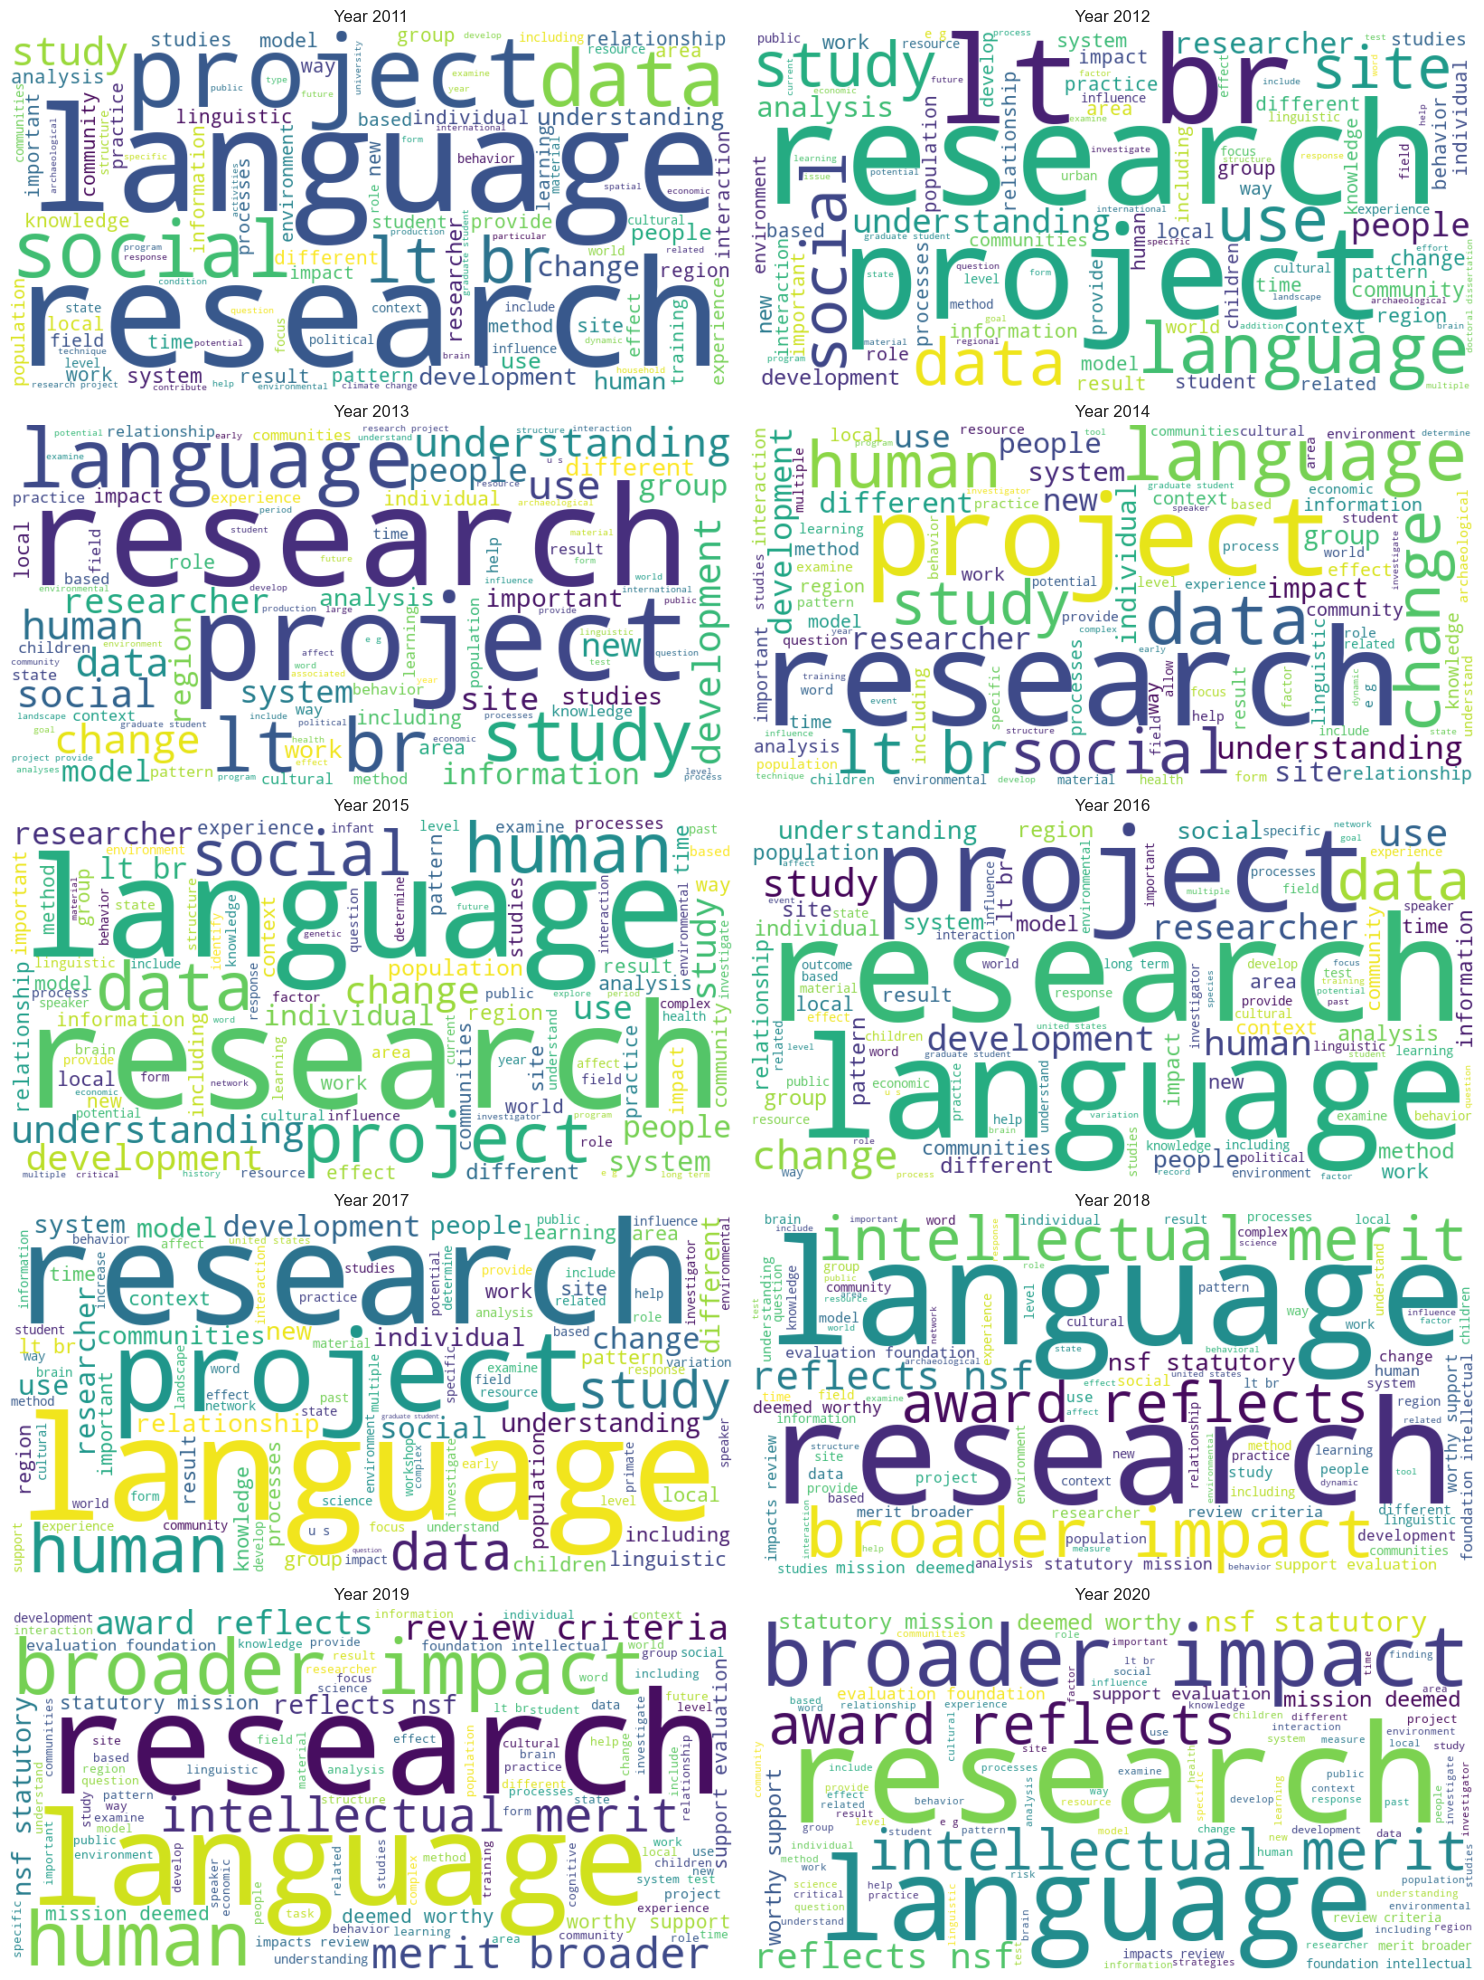

In [27]:
# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=2,  figsize=(15, 20))
axes = axes.flatten()

for i, row in funding_info_aggregated_words.iterrows():
    # Generate a word cloud image for each year
    wordcloud = WordCloud(background_color='white', max_words=100, width=800, height=400).generate(row['wordcloud_text_cleaned'])
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(f"Year {row['award_year']}")
    plt.tight_layout()

fig.savefig('funding_abstract_wordclouds.png', dpi=300)

# Funding vs. Research Impact

In [5]:
# Add a column indicating whether the specific publication is before or after NSF award
# Here, we take publication year which is the same as award year as "before_award"
regression_data["before_after_award"] = np.where(regression_data["year"] <= regression_data["award_year"], "before_award", "after_award")

In [7]:
group_by_citation = regression_data.groupby(by=['before_after_award', 'email'])['citation'].mean().reset_index()

# find thresholds
Q1 = group_by_citation['citation'].quantile(0.25)
Q3 = group_by_citation['citation'].quantile(0.75)
IQR = Q3 - Q1

# remvoe outliers
group_by_citation = group_by_citation.query('(@Q1 - 1.5 * @IQR) <= citation <= (@Q3 + 1.5 * @IQR)')
group_by_citation

,before_after_award,email,citation
0,after_award,00t0holtgrav@bsu.edu,543.250000
1,after_award,Alvard@tamu.edu,587.428571
3,after_award,Amy.Syvertsen@gmail.com,373.250000
4,after_award,Ariel.Goldberg@tufts.edu,66.250000
5,after_award,Ashley.VanMeter@georgetown.edu,523.000000
...,...,...,...
4051,before_award,zhonglin@nyu.edu,1017.800000
4052,before_award,zkrizan@iastate.edu,126.600000
4053,before_award,zoe.wool@rice.edu,22.750000
4054,before_award,zook@uky.edu,300.500000


In [9]:
# Calculate median values of average yearly citation
median_yearly_citation = group_by_citation.groupby(by=['before_after_award'])['citation'].median()

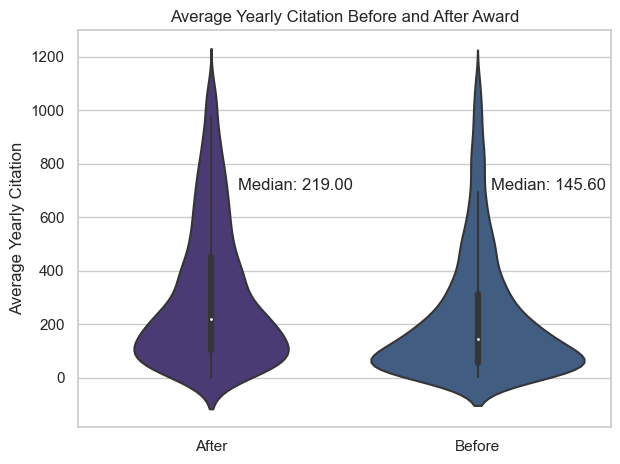

In [13]:
sns.despine(offset=10, trim=True)
sns.violinplot(data=group_by_citation, x='before_after_award', y='citation')
plt.title('Average Yearly Citation Before and After Award')

plt.text(x=0.1, y=700, s=f"Median: {median_yearly_citation[0]:.2f}")
plt.text(x=1.05, y=700, s=f"Median: {median_yearly_citation[1]:.2f}")

plt.xlabel('')
plt.ylabel('Average Yearly Citation')

plt.xticks([0, 1], ['After', 'Before'])
plt.tight_layout()
plt.show()

Can also add some scatter plot between funding and publication-related measures later => Correlation Analysis: Scatter plots with regression lines showing the relationship between funding amounts and various measures of research impact (e.g., citations, H-index, publication count) to identify if more significant funding correlates with higher impact.

# Clustering of Author's Research (Topics)

Can add clustering by authors results here, along with wordclouds for each cluster

Another thing is perhaps add top journal (bar chart) for each cluster

Another wordcloud application is author's research interest

A set of pie charts or a treemap to show how funding is distributed among different clusters => which areas of research are more heavily funded